## LEGO Color Dataset for Data Visualization


In [3]:
library(ggplot2) 
library(readr) 
library(tidyverse,warn.conflicts = FALSE)
library(RColorBrewer)
options(warn=-1,message=-1)
library(dplyr)
library(ggthemes)
library(packcircles)
setwd('/Users/nli/dev/Week9-ResearchProjects')

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ purrr   0.3.4       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
colors <-read.csv('./lego-database/colors.csv')
sets <-read.csv('./lego-database/sets.csv')
parts <-read.csv('./lego-database/parts.csv')
inventory_sets <-read.csv('./lego-database/inventory_sets.csv')
inventories <-read.csv('./lego-database/inventories.csv')
inventory_parts <-read.csv('./lego-database/inventory_parts.csv')
themes <-read.csv('./lego-database/themes.csv')
part_categories <-read.csv('./lego-database/part_categories.csv')

In [5]:
# Summary of all tables
summary(colors)
summary(sets)
summary(parts)
summary(inventory_sets)
summary(inventories)
summary(inventory_parts)
summary(themes)
summary(part_categories)

       id                        name          rgb      is_trans
 Min.   :  -1.0   Aqua             :  1   000000 :  3   f:107   
 1st Qu.:  34.5   Black            :  1   FFFFFF :  3   t: 28   
 Median :  85.0   Blue             :  1   05131D :  2           
 Mean   : 253.0   Blue-Violet      :  1   635F52 :  2           
 3rd Qu.: 231.0   Bright Green     :  1   A5A5CB :  2           
 Max.   :9999.0   Bright Light Blue:  1   C91A09 :  2           
                  (Other)          :129   (Other):121           

    set_num                          name            year         theme_id    
 00-1   :    1   Basic Building Set    :   55   Min.   :1950   Min.   :  1.0  
 00-2   :    1   Universal Building Set:   32   1st Qu.:1997   1st Qu.:161.0  
 00-3   :    1   Basic Set             :   23   Median :2005   Median :324.0  
 00-4   :    1   Helicopter            :   23   Mean   :2002   Mean   :311.3  
 00-6   :    1   Fire Station          :   14   3rd Qu.:2012   3rd Qu.:470.0  
 00-7   :    1   Tow Truck             :   14   Max.   :2017   Max.   :614.0  
 (Other):11667   (Other)               :11512                                 
   num_parts     
 Min.   :  -1.0  
 1st Qu.:  10.0  
 Median :  45.0  
 Mean   : 162.3  
 3rd Qu.: 172.0  
 Max.   :5922.0  
                 

    part_num    
 0687b1 :    1  
 0901   :    1  
 0902   :    1  
 0903   :    1  
 0904   :    1  
 1      :    1  
 (Other):25987  
                                                            name      
 Minifig                                                      :   38  
 Minifig - Jack Stone                                         :   18  
 Minifig - 4 Juniors                                          :    4  
 Minifig Head Modified Wookiee [Plain]                        :    4  
 Duplo Bear Adult New Style                                   :    3  
 Duplo Brick 2 x 3 with Curved Top and Eye Print on Both Sides:    3  
 (Other)                                                      :25923  
  part_cat_id   
 Min.   : 1.00  
 1st Qu.:13.00  
 Median :13.00  
 Mean   :19.49  
 3rd Qu.:27.00  
 Max.   :57.00  
                

  inventory_id      set_num        quantity     
 Min.   :   35   7241-1 :  12   Min.   : 1.000  
 1st Qu.: 3692   3741-1 :  11   1st Qu.: 1.000  
 Median : 7902   3742-1 :  11   Median : 1.000  
 Mean   : 8017   7741-1 :  11   Mean   : 1.376  
 3rd Qu.:11476   7942-1 :  11   3rd Qu.: 1.000  
 Max.   :18701   3740-1 :  10   Max.   :60.000  
                 (Other):2780                   

       id           version         set_num     
 Min.   :    1   Min.   :1.000   421-2  :    5  
 1st Qu.: 4156   1st Qu.:1.000   11905-1:    2  
 Median : 8404   Median :1.000   214.6-1:    2  
 Mean   : 8412   Mean   :1.002   31015-1:    2  
 3rd Qu.:12585   3rd Qu.:1.000   6515-1 :    2  
 Max.   :18708   Max.   :5.000   75053-1:    2  
                                 (Other):11666  

  inventory_id      part_num         color_id          quantity       
 Min.   :    1   6141   : 16550   Min.   :  -1.00   Min.   :   1.000  
 1st Qu.: 4352   3023   : 10359   1st Qu.:   1.00   1st Qu.:   1.000  
 Median : 8635   3004   :  8634   Median :  15.00   Median :   2.000  
 Mean   : 8605   3020   :  7566   Mean   :  78.47   Mean   :   3.325  
 3rd Qu.:12794   3022   :  7052   3rd Qu.:  71.00   3rd Qu.:   4.000  
 Max.   :18708   54200  :  7042   Max.   :9999.00   Max.   :1440.000  
                 (Other):523048                                       
 is_spare  
 f:550756  
 t: 29495  
           
           
           
           
           

       id                  name       parent_id    
 Min.   :  1.0   Supplemental: 18   Min.   :  1.0  
 1st Qu.:154.2   Fire        : 12   1st Qu.:126.0  
 Median :307.5   Airport     : 11   Median :264.0  
 Mean   :307.5   Harbor      :  9   Mean   :274.3  
 3rd Qu.:460.8   Traffic     :  9   3rd Qu.:430.0  
 Max.   :614.0   Castle      :  8   Max.   :591.0  
                 (Other)     :547   NA's   :111    

       id                                          name   
 Min.   : 1   Bars, Ladders and Fences               : 1  
 1st Qu.:15   Baseplates                             : 1  
 Median :29   Belville, Scala and Fabuland           : 1  
 Mean   :29   Bionicle, Hero Factory and Constraction: 1  
 3rd Qu.:43   Bricks                                 : 1  
 Max.   :57   Bricks Curved                          : 1  
              (Other)                                :51  

In [6]:
typeof(colors)
typeof(sets)
typeof(parts)
typeof(inventory_sets)
typeof(inventories)
typeof(inventory_parts)
typeof(themes)
typeof(part_categories)

[1] "list"

[1] "list"

[1] "list"

[1] "list"

[1] "list"

[1] "list"

[1] "list"

[1] "list"

In [7]:
sum(is.na(colors))
sum(is.na(sets))
sum(is.na(parts))
sum(is.na(inventory_sets))
sum(is.na(inventories))
sum(is.na(inventory_parts))
sum(is.na(themes))
sum(is.na(part_categories))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 111

[1] 0

In [8]:
head(colors)
num_colors <- length(unique(colors$name))
paste("Number of Unique colors in Lego sets =",num_colors) 

colors<-colors%>%mutate(rgb=paste0("#", str_trim(rgb)))
fav_color <- colors$rgb
names(fav_color) <- fav_color

id,name,rgb,is_trans
-1,Unknown,0033B2,f
0,Black,05131D,f
1,Blue,0055BF,f
2,Green,237841,f
3,Dark Turquoise,008F9B,f
4,Red,C91A09,f


[1] "Number of Unique colors in Lego sets = 135"

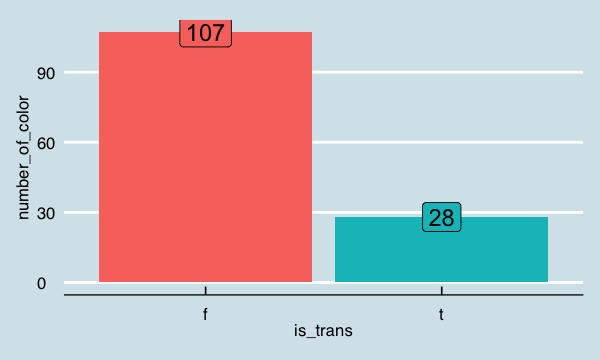

In [9]:
#simple bar plot
color_counts <- colors %>% 
  group_by(is_trans) %>% 
  summarize(number_of_color = n())
options(repr.plot.width=5, repr.plot.height=3)
ggplot(color_counts, aes(x=is_trans, 
                         y=number_of_color, 
                         fill=as.factor(is_trans))) +
  geom_bar(stat='identity') + 
  theme_economist() +
  theme(legend.position='none')+
  geom_label(aes(label=number_of_color), size=5)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	66 obs. of  2 variables:
 $ year         : int  1950 1953 1954 1955 1956 1957 1958 1959 1960 1961 ...
 $ avg_num_parts: num  10.1 16.5 12.4 36.9 18.5 ...


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


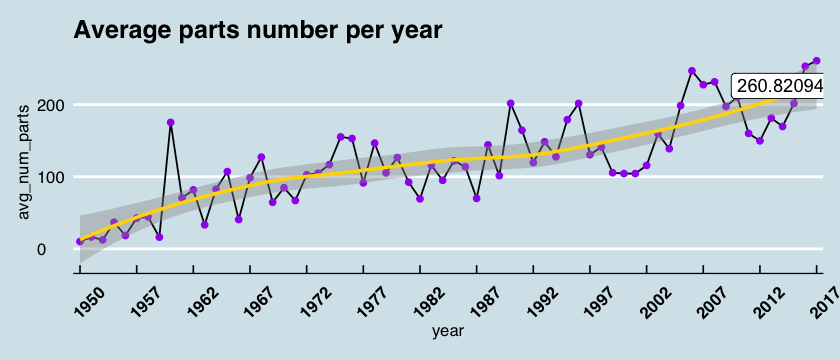

In [18]:
##Average parts per year
options(repr.plot.width=7, repr.plot.height=3)
#select the parameter
avg_parts_per_year <- sets %>% 
  select(year, num_parts) %>% 
  group_by(year) %>% 
  summarize(avg_num_parts=mean(num_parts))
str(avg_parts_per_year)
avg_parts_per_year$year <- as.factor(avg_parts_per_year$year)

avg_parts_per_year %>% ggplot(aes(x=year, 
                                  y=avg_num_parts, 
                                  group=1)) + 
  geom_line(size=0.5) + 
  geom_point(color='purple', size=1.5) +
  geom_smooth(aes(group=1), color = 'gold') +
  theme_economist() +
  theme(axis.text.x = 
          element_text(angle=45, face='bold', hjust=0), 
        legend.position = 'none') +
  scale_x_discrete(breaks = 
                     avg_parts_per_year$year[seq(1,
                                                 length(avg_parts_per_year$year), by = 5)]) +
  geom_label(data=subset(avg_parts_per_year, avg_num_parts == max(avg_num_parts)),
             aes(label=avg_num_parts, y = avg_num_parts), vjust = 1.5 ) +
  ggtitle('Average parts number per year')

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


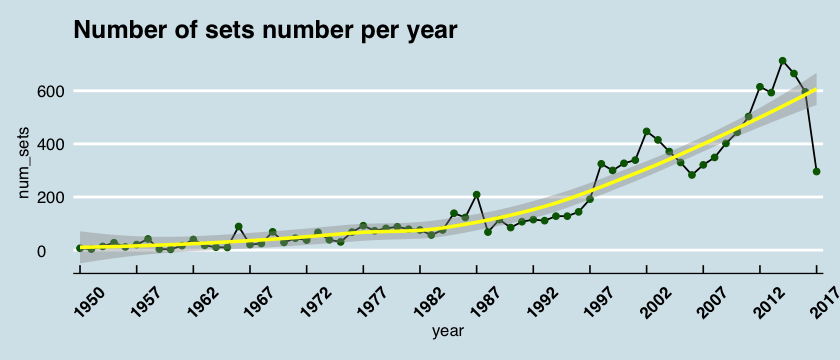

In [17]:
#Number sets per year
options(repr.plot.width=7, repr.plot.height=3)
num_sets_per_year <- sets %>%
  select(year, set_num) %>%
  group_by(year) %>%
  summarize(num_sets = n())
#str(num_sets_per_year)
num_sets_per_year$year <- as.factor(num_sets_per_year$year)

num_sets_per_year %>% ggplot(aes(x=year, 
                                 y=num_sets, 
                                 group=1)) + 
  #geom_bar(stat='identity')
  geom_line(size=0.5) + 
  geom_point(color='darkgreen', size=1.5) +
  geom_smooth(aes(group=1), color = 'yellow') +
  theme_economist() +
  theme(axis.text.x = 
          element_text(angle=45, face='bold', hjust=0), 
        legend.position = 'none') +   # x-axis scale
  scale_x_discrete(breaks = 
                     num_sets_per_year$year[seq(1,
                                                length(num_sets_per_year$year), by = 5)]) + # x-interval
  ggtitle('Number of sets number per year')

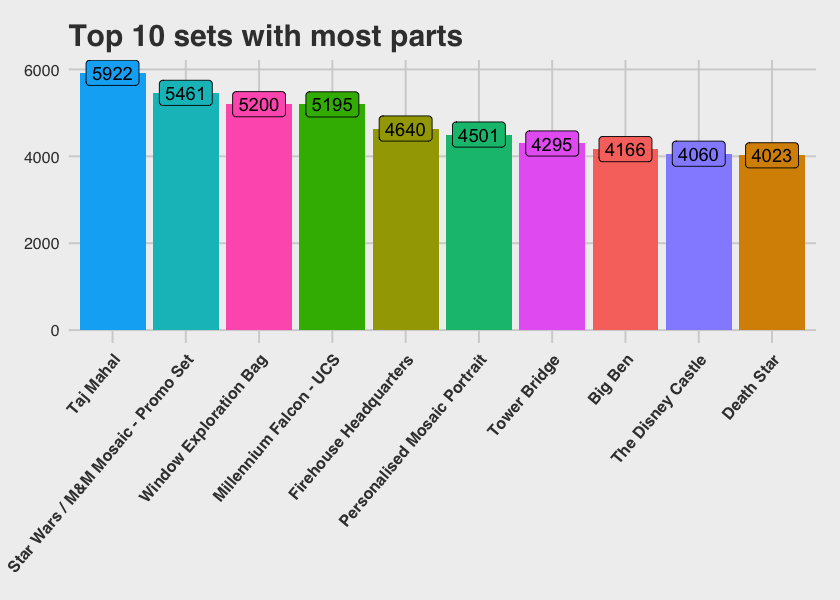

In [12]:
#Top 10 sets with most parts:
#select the parameter
name_w_most_parts <- sets %>% 
  select(name, year, num_parts) %>% 
  arrange(desc(num_parts))
top_10_names <- name_w_most_parts[1:10,]

options(repr.plot.width=7, repr.plot.height=5)

top_10_names %>% ggplot(aes(x=reorder(name, -num_parts), 
                            y=num_parts, 
                            fill=name)) +
  geom_histogram(stat='identity') + 
  theme_fivethirtyeight() +
  theme(axis.text.x = 
          element_text(angle=50, face='bold', hjust=1),
        legend.position = 'none') +
  geom_label(aes(label=num_parts)) +
  ggtitle('Top 10 sets with most parts')